<a href="https://colab.research.google.com/github/K-107/dki/blob/main/211111/PHR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HE_ht: 키
HE_wt: 몸무게
HE_sbp: 수축기
HE_dbp: 이완기
HE_glu: 공복혈당
HE_HB: 혈색소

age: 나이 Y

In [2]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/PHR/PHR_20082017_raw.csv')
df = df[['age','HE_ht','HE_wt','HE_sbp','HE_dbp','HE_glu','HE_HB']].dropna().reset_index()
df.drop('index',axis=1,inplace=True)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (155) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,HE_ht,HE_wt,HE_sbp,HE_dbp,HE_glu,HE_HB
0,51.0,168.0,57.6,110.0,80.0,89.0,15.0
1,46.0,156.4,73.1,114.0,79.0,98.0,11.9
2,25.0,157.9,50.7,99.0,69.0,87.0,13.2
3,54.0,173.2,89.6,121.0,83.0,99.0,15.1
4,49.0,159.2,67.0,111.0,81.0,90.0,11.2
...,...,...,...,...,...,...,...
65583,46.0,146.9,69.0,131.0,84.0,92.0,13.7
65584,22.0,160.1,40.2,109.0,73.0,88.0,13.4
65585,18.0,175.2,85.4,111.0,59.0,99.0,16.9
65586,77.0,158.2,60.3,126.0,80.0,88.0,16.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65588 entries, 0 to 65587
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     65588 non-null  float64
 1   HE_ht   65588 non-null  float64
 2   HE_wt   65588 non-null  float64
 3   HE_sbp  65588 non-null  float64
 4   HE_dbp  65588 non-null  float64
 5   HE_glu  65588 non-null  float64
 6   HE_HB   65588 non-null  float64
dtypes: float64(7)
memory usage: 3.5 MB


In [4]:
age_100 = []
for i in range(100):
  age_100.append(i)

In [5]:
set(age_100) - set(sorted(df.age.unique()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 94, 96, 98, 99}

In [6]:
df = df[(df.age>=9) & (df.age<=93)]
df

,age,HE_ht,HE_wt,HE_sbp,HE_dbp,HE_glu,HE_HB
0,51.0,168.0,57.6,110.0,80.0,89.0,15.0
1,46.0,156.4,73.1,114.0,79.0,98.0,11.9
2,25.0,157.9,50.7,99.0,69.0,87.0,13.2
3,54.0,173.2,89.6,121.0,83.0,99.0,15.1
4,49.0,159.2,67.0,111.0,81.0,90.0,11.2
...,...,...,...,...,...,...,...
65583,46.0,146.9,69.0,131.0,84.0,92.0,13.7
65584,22.0,160.1,40.2,109.0,73.0,88.0,13.4
65585,18.0,175.2,85.4,111.0,59.0,99.0,16.9
65586,77.0,158.2,60.3,126.0,80.0,88.0,16.2


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.drop('age', axis=1))
scaled

array([[0.69084423, 0.27211394, 0.23121387, 0.52287582, 0.07679466,
        0.67272727],
       [0.5529132 , 0.38830585, 0.25433526, 0.51633987, 0.0918197 ,
        0.48484848],
       [0.57074911, 0.22038981, 0.16763006, 0.45098039, 0.07345576,
        0.56363636],
       ...,
       [0.7764566 , 0.48050975, 0.23699422, 0.38562092, 0.09348915,
        0.78787879],
       [0.57431629, 0.29235382, 0.32369942, 0.52287582, 0.07512521,
        0.74545455],
       [0.52913199, 0.32683658, 0.3699422 , 0.49019608, 0.09015025,
        0.54545455]])

In [30]:
df.HE_glu.min()

43.0

In [8]:
print(scaler.n_samples_seen_, scaler.data_min_, scaler.data_max_, scaler.feature_range)

65586 [109.9  21.3  70.    0.   43.    3.9] [194.  154.7 243.  153.  642.   20.4] (0, 1)


In [18]:
from sklearn.model_selection import train_test_split

X = scaled
y = df.age

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

LGBM = LGBMRegressor(n_estimators=200).fit(x_train,y_train)
pred = LGBM.predict(x_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE:  ', np.round(mse,3))
print('MAE: ', np.round(mae,3))
print('결정계수 R2: ', np.round(r2,3))

MSE:   185.387
MAE:  10.338
결정계수 R2:  0.509


In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(6,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=32,
          )

results = model.evaluate(x_test, y_test)

Epoch 1/10
1640/1640 [==============================] - 6s 4ms/step - loss: 351.2383 - mae: 14.7309
Epoch 2/10
1640/1640 [==============================] - 6s 4ms/step - loss: 231.1138 - mae: 12.1424
Epoch 3/10
1640/1640 [==============================] - 6s 4ms/step - loss: 211.2862 - mae: 11.4185
Epoch 4/10
1640/1640 [==============================] - 6s 4ms/step - loss: 206.0238 - mae: 11.2130
Epoch 5/10
1640/1640 [==============================] - 6s 4ms/step - loss: 203.6658 - mae: 11.1148
Epoch 6/10
1640/1640 [==============================] - 6s 4ms/step - loss: 200.8233 - mae: 11.0029
Epoch 7/10
1640/1640 [==============================] - 6s 4ms/step - loss: 199.5089 - mae: 10.9485
Epoch 8/10
1640/1640 [==============================] - 6s 4ms/step - loss: 197.9843 - mae: 10.8728
Epoch 9/10
1640/1640 [==============================] - 6s 4ms/step - loss: 197.4714 - mae: 10.8509
Epoch 10/10
410/410 [==============================] - 1s 3ms/step - loss: 198.0890 - mae: 10.7927


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


In [22]:
results

[198.08897399902344, 10.792736053466797]

In [23]:
y_test

19851    40.0
3787     57.0
29774    24.0
45880    20.0
38451    64.0
         ... 
43752    73.0
58625    37.0
8899     16.0
55980    47.0
17354    11.0
Name: age, Length: 13118, dtype: float64

In [24]:
model.predict(x_test).reshape(-1)

array([42.113163, 35.097687, 27.884367, ..., 32.400883, 41.32461 ,
       56.743893], dtype=float32)

In [25]:
# 모델 inference 부분
params = [[180.6, 72.8, 118, 79, 92, 14.5]]
params = scaler.transform(params)
model.predict(params)

array([[35.004467]], dtype=float32)

# 제안서와 비슷한 수준

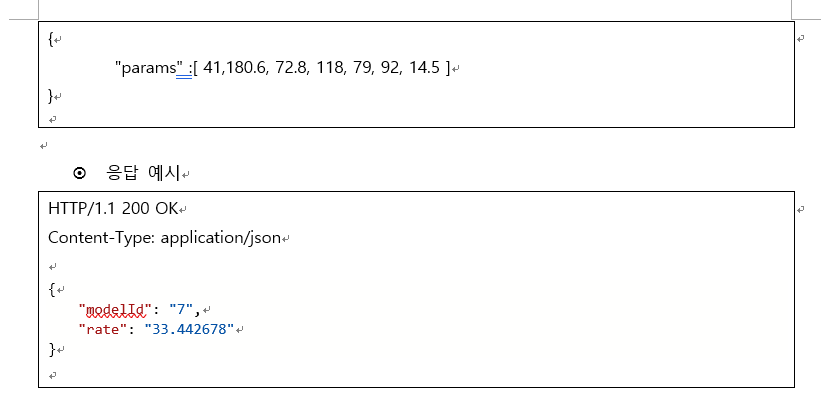

In [ ]:
df_test = pd.DataFrame(data=y_test)
df_test['pred_age'] = model.predict(x_test).reshape(-1)
df_test

,age,pred_age
19851,40.0,46.258163
3787,57.0,40.447441
29774,24.0,25.195845
45880,20.0,35.796192
38451,64.0,38.238758
...,...,...
43752,73.0,49.299782
58625,37.0,44.352314
8899,16.0,29.692650
55980,47.0,43.294182


In [ ]:
model.save('/content/drive/MyDrive/PHR/PHR.pb', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/PHR/PHR.pb/assets
